In [19]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import sympy as sy
from sklearn import metrics

In [2]:
!ls

MicasenseQEvals_trim.csv
RedEdge_3_Filters_srs.xlsx
rededge_rsr.csv
rededge_RSR.ipynb
rededge_RSR_area_under_curve.ipynb


In [3]:
re_filts = pd.read_csv('./rededge_rsr.csv')

In [4]:
re_filts.head()

,Wavlength (nm),b,g,r,re,nir
0,392,0.007917,0.017997,0.006575,0.011476,0.005033
1,393,0.007836,0.015377,0.010038,0.023562,0.004924
2,394,0.006408,0.015209,0.009209,0.028815,0.005597
3,395,0.006274,0.009561,0.009870,0.024975,0.004231
4,396,0.005210,0.010333,0.007013,0.005397,0.005787


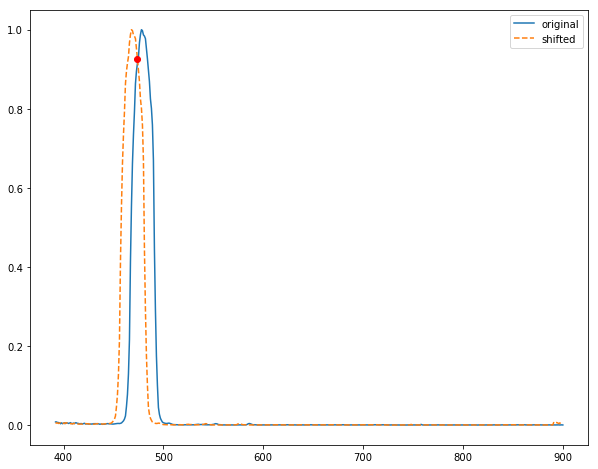

In [53]:
# shift the blue and calc area of shifted to original
l = re_filts['Wavlength (nm)'].values
b = re_filts['b'].values
shift_val = -10
b_shift = np.roll(b, shift_val)

# find intersection points
idx = np.argwhere(np.diff(np.sign(b - b_shift))).flatten()
idx_threshold = 0.05
idx_t = idx[b_shift[idx] > idx_threshold]

plt.figure(figsize=(10,8))
plt.plot(l, b, label='original')
plt.plot(l, b_shift, '--', label='shifted')
plt.plot(l[idx_t], b_shift[idx_t], 'ro')
plt.legend()
plt.show()

